# Gouwens baseline analysis using pre-extracted features

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

In [25]:
# Load extracted morphology features
df = pd.read_csv("SpecimenMetadata.csv")
df = df[[
       'Specimen ID', 'T type',
       'Axon Bias X (millimeters)', 'Axon Bias Y (millimeters)',
       'Axon Contraction', 'Axon Emd With Basal Dendrite',
       'Axon Extent X (millimeters)', 'Axon Extent Y (millimeters)',
       'Axon Hist Pc 0', 'Axon Hist Pc 1', 'Axon Hist Pc 2', 'Axon Hist Pc 3',
       'Axon Hist Pc 4', 'Axon Max Branch Order',
       'Axon Max Euclidean Distance (millimeters)',
       'Axon Max Path Distance (millimeters)', 'Axon Num Branches',
       'Axon Pct Above Basal Dendrite', 'Axon Pct Below Basal Dendrite',
       'Axon Pct Intersect Basal Dendrite', 'Axon Soma Distance (millimeters)',
       'Axon Soma Percentile X', 'Axon Soma Percentile Y', 'Axon Soma Theta',
       'Axon Total Length (millimeters)',
       'Basal Dendrite Bias X (millimeters)',
       'Basal Dendrite Bias Y (millimeters)', 'Basal Dendrite Contraction',
       'Basal Dendrite Extent X (millimeters)',
       'Basal Dendrite Extent Y (millimeters)',
       'Basal Dendrite Max Branch Order',
       'Basal Dendrite Max Euclidean Distance (millimeters)',
       'Basal Dendrite Max Path Distance (millimeters)',
       'Basal Dendrite Num Branches', 'Basal Dendrite Num Stems',
       'Basal Dendrite Pct Above Axon', 'Basal Dendrite Pct Below Axon',
       'Basal Dendrite Pct Intersect Axon', 'Basal Dendrite Soma Percentile X',
       'Basal Dendrite Soma Percentile Y', 'Basal Dendrite Stem Exit Down',
       'Basal Dendrite Stem Exit Side Less',
       'Basal Dendrite Stem Exit Side More', 'Basal Dendrite Stem Exit Up',
       'Basal Dendrite Total Length (millimeters)', 'Normalized Soma Depth']]
df = df.dropna()
df = df.set_index('Specimen ID')
df

,T type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,Sncg Vip Nptx2,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.000000,0.333333,0.666667,2.522126,0.723234
658012080,Sst Crhr2 Efemp1,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.000000,0.400000,0.200000,3.656877,0.825192
663193112,Pvalb Gpr149 Islr,0.141751,0.291822,0.881167,14.244784,0.656641,0.390143,-345.340358,-20.568131,-692.178498,...,0.000603,0.999397,0.243211,0.180447,0.166667,0.333333,0.333333,0.166667,2.454357,0.644408
827447865,Lamp5 Plch2 Dock5,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.000000,0.200000,0.600000,2.522022,0.321378
808875776,Sst Hpse Sema3c,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,-30.011692,-891.574251,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.000000,0.000000,0.600000,2.391990,0.553258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601811091,Sst Esm1,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
913928092,Sncg Gpr50,0.072372,0.115160,0.835046,11.887683,0.737567,0.644806,-779.943733,-193.729231,83.280746,...,0.000000,1.000000,0.433884,0.376033,0.250000,0.250000,0.250000,0.250000,3.393031,0.665245
871782504,Pvalb Reln Tac1,0.042901,0.134388,0.866301,11.642856,0.308193,0.378408,-393.698171,-63.591124,-830.295938,...,0.000000,1.000000,0.437388,0.345117,0.400000,0.000000,0.200000,0.400000,2.237695,0.617466


In [3]:
df["T type"].value_counts()

Sst Hpse Cbln4           30
Sst Calb2 Pdlim5         29
Pvalb Reln Itm2a         23
Sst Crhr2 Efemp1         19
Lamp5 Plch2 Dock5        18
Pvalb Tpbg               18
Sst Esm1                 18
Lamp5 Lsp1               16
Sst Chodl                16
Sst Tac1 Htr1d           15
Sncg Gpr50               14
Pvalb Sema3e Kank4       13
Sst Mme Fam114a1         13
Vip Lmo1 Myl1            13
Sst Myh8 Etv1            13
Sst Tac2 Tacstd2         12
Vip Crispld2 Kcne4       12
Sst Hpse Sema3c          12
Sncg Vip Itih5           12
Vip Pygm C1ql1           11
Vip Ptprt Pkp2           11
Sst Rxfp1 Eya1           10
Sst Nts                  10
Sst Rxfp1 Prdm8          10
Lamp5 Ntn1 Npy2r          9
Pvalb Akr1c18 Ntf3        9
Sst Calb2 Necab1          9
Sst Nr2f2 Necab1          8
Sst Crh 4930553C11Rik     8
Vip Crispld2 Htr2c        8
Vip Chat Htr1f            7
Pvalb Gabrg1              7
Sst Tac1 Tacr3            6
Sncg Vip Nptx2            6
Sst Chrna2 Glra3          6
Vip Lect1 Oxtr      

## Random Forest Classifier on full dataset

### T-type

Accuracy for fold 1: 0.38235294117647056
Accuracy for fold 2: 0.3431372549019608
Accuracy for fold 3: 0.3431372549019608
Accuracy for fold 4: 0.37254901960784315
Accuracy for fold 5: 0.35294117647058826


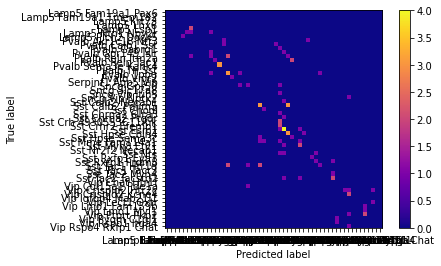

Average accuracy: 0.3588235294117647


In [32]:
# 5-fold Cross Validation
y = df["T type"]
X = df.drop("T type", axis=1)

X = X.reset_index(drop=True).to_numpy()
y = y.reset_index(drop=True).to_numpy()

k = 0
acc_sum = 0
for train_index, test_index in KFold(n_splits=5).split(X):
    k += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
    rfc.fit(X_train, y_train)
    acc = rfc.score(X_test, y_test)
    print(f"Accuracy for fold {k}: {acc}")
    acc_sum += acc
    
    if (k == 5):
        pred = rfc.predict(X_test)
        cm = confusion_matrix(y_test, pred, labels=rfc.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
        disp.plot(include_values=False, cmap='plasma')
        plt.show()
print(f"Average accuracy: {acc_sum / k}")

In [4]:
df = pd.read_csv("SpecimenMetadata.csv")
df = df[[
       'Specimen ID', 'MET type',
       'Axon Bias X (millimeters)', 'Axon Bias Y (millimeters)',
       'Axon Contraction', 'Axon Emd With Basal Dendrite',
       'Axon Extent X (millimeters)', 'Axon Extent Y (millimeters)',
       'Axon Hist Pc 0', 'Axon Hist Pc 1', 'Axon Hist Pc 2', 'Axon Hist Pc 3',
       'Axon Hist Pc 4', 'Axon Max Branch Order',
       'Axon Max Euclidean Distance (millimeters)',
       'Axon Max Path Distance (millimeters)', 'Axon Num Branches',
       'Axon Pct Above Basal Dendrite', 'Axon Pct Below Basal Dendrite',
       'Axon Pct Intersect Basal Dendrite', 'Axon Soma Distance (millimeters)',
       'Axon Soma Percentile X', 'Axon Soma Percentile Y', 'Axon Soma Theta',
       'Axon Total Length (millimeters)',
       'Basal Dendrite Bias X (millimeters)',
       'Basal Dendrite Bias Y (millimeters)', 'Basal Dendrite Contraction',
       'Basal Dendrite Extent X (millimeters)',
       'Basal Dendrite Extent Y (millimeters)',
       'Basal Dendrite Max Branch Order',
       'Basal Dendrite Max Euclidean Distance (millimeters)',
       'Basal Dendrite Max Path Distance (millimeters)',
       'Basal Dendrite Num Branches', 'Basal Dendrite Num Stems',
       'Basal Dendrite Pct Above Axon', 'Basal Dendrite Pct Below Axon',
       'Basal Dendrite Pct Intersect Axon', 'Basal Dendrite Soma Percentile X',
       'Basal Dendrite Soma Percentile Y', 'Basal Dendrite Stem Exit Down',
       'Basal Dendrite Stem Exit Side Less',
       'Basal Dendrite Stem Exit Side More', 'Basal Dendrite Stem Exit Up',
       'Basal Dendrite Total Length (millimeters)', 'Normalized Soma Depth']]
df = df.dropna()
df = df.set_index('Specimen ID')
df

,MET type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,Sncg-MET-1,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.000000,0.333333,0.666667,2.522126,0.723234
658012080,Sst-MET-12,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.000000,0.400000,0.200000,3.656877,0.825192
663193112,Pvalb-MET-3,0.141751,0.291822,0.881167,14.244784,0.656641,0.390143,-345.340358,-20.568131,-692.178498,...,0.000603,0.999397,0.243211,0.180447,0.166667,0.333333,0.333333,0.166667,2.454357,0.644408
827447865,Lamp5-MET-1,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.000000,0.200000,0.600000,2.522022,0.321378
808875776,Sst-MET-7,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,-30.011692,-891.574251,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.000000,0.000000,0.600000,2.391990,0.553258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601811091,Sst-MET-13,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
913928092,Sncg-MET-1,0.072372,0.115160,0.835046,11.887683,0.737567,0.644806,-779.943733,-193.729231,83.280746,...,0.000000,1.000000,0.433884,0.376033,0.250000,0.250000,0.250000,0.250000,3.393031,0.665245
871782504,Pvalb-MET-3,0.042901,0.134388,0.866301,11.642856,0.308193,0.378408,-393.698171,-63.591124,-830.295938,...,0.000000,1.000000,0.437388,0.345117,0.400000,0.000000,0.200000,0.400000,2.237695,0.617466


### MET-type

Accuracy for fold 1: 0.5714285714285714
Accuracy for fold 2: 0.5306122448979592
Accuracy for fold 3: 0.5612244897959183
Accuracy for fold 4: 0.6391752577319587
Accuracy for fold 5: 0.5154639175257731


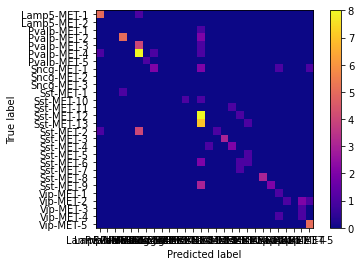

Average accuracy: 0.5635808962760361


In [34]:
# 5-fold Cross Validation
y = df["MET type"]
X = df.drop("MET type", axis=1)

X = X.reset_index(drop=True).to_numpy()
y = y.reset_index(drop=True).to_numpy()

k = 0
acc_sum = 0
for train_index, test_index in KFold(n_splits=5).split(X):
    k += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
    rfc.fit(X_train, y_train)
    acc = rfc.score(X_test, y_test)
    print(f"Accuracy for fold {k}: {acc}")
    acc_sum += acc
    
    if (k == 5):
        pred = rfc.predict(X_test)
        cm = confusion_matrix(y_test, pred, labels=rfc.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
        disp.plot(include_values=False, cmap='plasma')
        plt.show()
print(f"Average accuracy: {acc_sum / k}")

In [111]:
df = pd.read_csv("SpecimenMetadata.csv")
df = df[[
       'Specimen ID', 'T type', 'MET type',
       'Axon Bias X (millimeters)', 'Axon Bias Y (millimeters)',
       'Axon Contraction', 'Axon Emd With Basal Dendrite',
       'Axon Extent X (millimeters)', 'Axon Extent Y (millimeters)',
       'Axon Hist Pc 0', 'Axon Hist Pc 1', 'Axon Hist Pc 2', 'Axon Hist Pc 3',
       'Axon Hist Pc 4', 'Axon Max Branch Order',
       'Axon Max Euclidean Distance (millimeters)',
       'Axon Max Path Distance (millimeters)', 'Axon Num Branches',
       'Axon Pct Above Basal Dendrite', 'Axon Pct Below Basal Dendrite',
       'Axon Pct Intersect Basal Dendrite', 'Axon Soma Distance (millimeters)',
       'Axon Soma Percentile X', 'Axon Soma Percentile Y', 'Axon Soma Theta',
       'Axon Total Length (millimeters)',
       'Basal Dendrite Bias X (millimeters)',
       'Basal Dendrite Bias Y (millimeters)', 'Basal Dendrite Contraction',
       'Basal Dendrite Extent X (millimeters)',
       'Basal Dendrite Extent Y (millimeters)',
       'Basal Dendrite Max Branch Order',
       'Basal Dendrite Max Euclidean Distance (millimeters)',
       'Basal Dendrite Max Path Distance (millimeters)',
       'Basal Dendrite Num Branches', 'Basal Dendrite Num Stems',
       'Basal Dendrite Pct Above Axon', 'Basal Dendrite Pct Below Axon',
       'Basal Dendrite Pct Intersect Axon', 'Basal Dendrite Soma Percentile X',
       'Basal Dendrite Soma Percentile Y', 'Basal Dendrite Stem Exit Down',
       'Basal Dendrite Stem Exit Side Less',
       'Basal Dendrite Stem Exit Side More', 'Basal Dendrite Stem Exit Up',
       'Basal Dendrite Total Length (millimeters)', 'Normalized Soma Depth']]
df = df.dropna()
df

,Specimen ID,T type,MET type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
12,714755043,Sncg Vip Nptx2,Sncg-MET-1,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.000000,0.333333,0.666667,2.522126,0.723234
14,658012080,Sst Crhr2 Efemp1,Sst-MET-12,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.000000,0.400000,0.200000,3.656877,0.825192
15,663193112,Pvalb Gpr149 Islr,Pvalb-MET-3,0.141751,0.291822,0.881167,14.244784,0.656641,0.390143,-345.340358,...,0.000603,0.999397,0.243211,0.180447,0.166667,0.333333,0.333333,0.166667,2.454357,0.644408
19,827447865,Lamp5 Plch2 Dock5,Lamp5-MET-1,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.000000,0.200000,0.600000,2.522022,0.321378
26,808875776,Sst Hpse Sema3c,Sst-MET-7,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.000000,0.000000,0.600000,2.391990,0.553258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,601811091,Sst Esm1,Sst-MET-13,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
4221,913928092,Sncg Gpr50,Sncg-MET-1,0.072372,0.115160,0.835046,11.887683,0.737567,0.644806,-779.943733,...,0.000000,1.000000,0.433884,0.376033,0.250000,0.250000,0.250000,0.250000,3.393031,0.665245
4237,871782504,Pvalb Reln Tac1,Pvalb-MET-3,0.042901,0.134388,0.866301,11.642856,0.308193,0.378408,-393.698171,...,0.000000,1.000000,0.437388,0.345117,0.400000,0.000000,0.200000,0.400000,2.237695,0.617466
4275,661492805,Sst Calb2 Pdlim5,Sst-MET-4,0.131591,0.111315,0.855282,42.779886,0.395676,0.609369,396.106162,...,0.000000,1.000000,0.412364,0.629755,0.400000,0.200000,0.400000,0.000000,2.413561,0.496712


In [26]:
df.to_csv("extracted_features.csv", index=False)

## RFC function

In [72]:
def RFC(df, label_name, folds=5):
    y = df[label_name]
    X = df.drop(label_name, axis=1)
    features = X.columns

    X = X.reset_index(drop=True).to_numpy()
    y = y.reset_index(drop=True).to_numpy()

    k = 0
    acc_folds = 0
    mrr_folds = 0
    for train_index, test_index in KFold(n_splits=folds).split(X):
        k += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        rfc = RandomForestClassifier(n_estimators=500, oob_score=True)
        rfc.fit(X_train, y_train)
        acc = rfc.score(X_test, y_test)
        acc_folds += acc
        print(f"Accuracy for fold {k}: {acc}")
        
        prob = rfc.predict_proba(X_test)
        mrr_sum, mrr_count = 0, 0
        classes = list(rfc.classes_)
        for i, p in enumerate(prob):
            p = np.array(p)
            argsorted_output = np.argsort(-p).tolist()
            label_rank = argsorted_output.index(classes.index(y_test[i])) + 1
            mrr_sum += 1 / label_rank
            mrr_count += 1
        mrr_folds += mrr_sum / mrr_count
        print(f"MRR for fold {k}: {mrr_sum / mrr_count}")
        
#         importances = pd.Series(rfc.feature_importances_, index=features)
#         print(importances.sort_values(ascending=False)[:10])
    
#         result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42)
#         importances = pd.Series(result.importances_mean, index=features)
#         print(importances.sort_values(ascending=False)[:10])

        if (k == folds):
            pred = rfc.predict(X_test)
            cm = confusion_matrix(y_test, pred, labels=rfc.classes_)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
            disp.plot(include_values=False, cmap='plasma')
            plt.grid(b=None)
            plt.show()
    print(f"Average accuracy: {acc_folds / k}")
    print(f"Average MRR: {mrr_folds / k}")

## RFC with subclass (476 cells)

In [120]:
features_df = pd.read_csv("extracted_features.csv")
subclasses = [row["T type"][:3] for _, row in features_df.iterrows()]
features_df["subclass"] = subclasses
features_df = features_df[features_df["subclass"] != "Ser"]
features_df = features_df.drop("T type", axis=1)
features_df = features_df.drop("MET type", axis=1)
features_df = features_df.set_index("Specimen ID")
features_df

,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,Axon Hist Pc 3,...,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth,subclass
Specimen ID,,,,,,,,,,,,,,,,,,,,,
714755043,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,-18.761695,319.569827,74.102948,...,0.839016,0.275014,0.419788,0.000000,0.000000,0.333333,0.666667,2.522126,0.723234,Snc
658012080,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,-187.936728,910.070179,506.015145,...,0.963527,0.373547,0.580762,0.400000,0.000000,0.400000,0.200000,3.656877,0.825192,Sst
663193112,0.141751,0.291822,0.881167,14.244784,0.656641,0.390143,-345.340358,-20.568131,-692.178498,-499.419339,...,0.999397,0.243211,0.180447,0.166667,0.333333,0.333333,0.166667,2.454357,0.644408,Pva
827447865,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,-735.106837,-962.950372,977.809846,...,1.000000,0.364856,0.507987,0.200000,0.000000,0.200000,0.600000,2.522022,0.321378,Lam
808875776,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,-30.011692,-891.574251,-521.329547,...,0.965424,0.283630,0.588331,0.400000,0.000000,0.000000,0.600000,2.391990,0.553258,Sst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601811091,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,-150.593571,...,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576,Sst
913928092,0.072372,0.115160,0.835046,11.887683,0.737567,0.644806,-779.943733,-193.729231,83.280746,78.246223,...,1.000000,0.433884,0.376033,0.250000,0.250000,0.250000,0.250000,3.393031,0.665245,Snc
871782504,0.042901,0.134388,0.866301,11.642856,0.308193,0.378408,-393.698171,-63.591124,-830.295938,-654.620141,...,1.000000,0.437388,0.345117,0.400000,0.000000,0.200000,0.400000,2.237695,0.617466,Pva


Accuracy for fold 1: 0.7959183673469388
MRR for fold 1: 0.8855442176870748
Accuracy for fold 2: 0.7346938775510204
MRR for fold 2: 0.8540816326530613
Accuracy for fold 3: 0.865979381443299
MRR for fold 3: 0.9278350515463916
Accuracy for fold 4: 0.8762886597938144
MRR for fold 4: 0.9364261168384881
Accuracy for fold 5: 0.845360824742268
MRR for fold 5: 0.9175257731958762


/opt/anaconda3/envs/neuron-morph/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


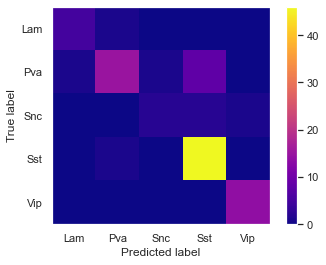

Average accuracy: 0.8236482221754681
Average MRR: 0.9042825583841785


In [121]:
RFC(features_df, "subclass")

## RFC on cells with significant MET-types from filtered cells (362 cells)

In [30]:
t_type_labels = pd.read_csv("combined-data/combined_metadata_filtered.csv", index_col=0)
t_type_labels = t_type_labels[t_type_labels["dataset"] == "gouwens"]
t_type_labels = t_type_labels.rename(columns={"cell_id": "Specimen ID"})
t_type_labels = t_type_labels.drop(columns=['dataset'])
t_type_labels["Specimen ID"] = pd.to_numeric(t_type_labels["Specimen ID"])
t_type_labels

,Specimen ID,t-type
0,601790961,Sst Tac2
1,601803754,Sst Calb2
2,601808698,Sst Hpse
3,601810307,Sst Calb2
4,601811091,Sst Esm1
...,...,...
413,741796557,Sst Myh8
414,741940660,Sst Mme
415,741788179,Sst Tac1
416,742009621,Sst Mme


In [31]:
features_df = pd.read_csv("extracted_features.csv")
features_df

,Specimen ID,T type,MET type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
0,714755043,Sncg Vip Nptx2,Sncg-MET-1,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.000000,0.333333,0.666667,2.522126,0.723234
1,658012080,Sst Crhr2 Efemp1,Sst-MET-12,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.000000,0.400000,0.200000,3.656877,0.825192
2,663193112,Pvalb Gpr149 Islr,Pvalb-MET-3,0.141751,0.291822,0.881167,14.244784,0.656641,0.390143,-345.340358,...,0.000603,0.999397,0.243211,0.180447,0.166667,0.333333,0.333333,0.166667,2.454357,0.644408
3,827447865,Lamp5 Plch2 Dock5,Lamp5-MET-1,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.000000,0.200000,0.600000,2.522022,0.321378
4,808875776,Sst Hpse Sema3c,Sst-MET-7,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.000000,0.000000,0.600000,2.391990,0.553258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,601811091,Sst Esm1,Sst-MET-13,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
484,913928092,Sncg Gpr50,Sncg-MET-1,0.072372,0.115160,0.835046,11.887683,0.737567,0.644806,-779.943733,...,0.000000,1.000000,0.433884,0.376033,0.250000,0.250000,0.250000,0.250000,3.393031,0.665245
485,871782504,Pvalb Reln Tac1,Pvalb-MET-3,0.042901,0.134388,0.866301,11.642856,0.308193,0.378408,-393.698171,...,0.000000,1.000000,0.437388,0.345117,0.400000,0.000000,0.200000,0.400000,2.237695,0.617466
486,661492805,Sst Calb2 Pdlim5,Sst-MET-4,0.131591,0.111315,0.855282,42.779886,0.395676,0.609369,396.106162,...,0.000000,1.000000,0.412364,0.629755,0.400000,0.200000,0.400000,0.000000,2.413561,0.496712


In [32]:
filtered_features_df = t_type_labels.merge(features_df, on="Specimen ID", how="left").dropna()
filtered_features_df = filtered_features_df.drop(columns=['T type', 't-type'])
filtered_features_df

,Specimen ID,MET type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
1,601803754,Sst-MET-3,0.042651,0.101365,0.750487,16.787736,0.569871,0.224995,1124.662599,3502.386535,...,0.037280,0.962720,0.460057,0.345760,0.375000,0.125000,0.125000,0.375000,4.108235,0.188472
2,601808698,Sst-MET-8,0.042200,0.341426,0.844058,10.022848,0.423536,0.588584,333.702937,-568.253216,...,0.000000,1.000000,0.316378,0.046954,0.250000,0.250000,0.500000,0.000000,2.309168,0.500847
3,601810307,Sst-MET-3,0.089760,0.234827,0.842963,12.242106,0.375707,0.346145,1355.104251,-120.610646,...,0.019544,0.980456,0.454165,0.201024,0.333333,0.000000,0.166667,0.500000,3.226121,0.297408
4,601811091,Sst-MET-13,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
5,602231708,Sst-MET-4,0.052813,0.349817,0.809972,24.640114,0.273554,0.558686,-314.130881,-76.505127,...,0.159046,0.840954,0.279324,0.985089,0.500000,0.250000,0.250000,0.000000,1.413938,0.612720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,741796557,Sst-MET-6,0.005424,0.466696,0.856802,32.757400,0.254609,0.579450,-312.619344,-38.461155,...,0.033803,0.966197,0.426479,0.636056,0.000000,0.400000,0.400000,0.200000,2.589227,0.695559
414,741940660,Sst-MET-12,0.027292,0.395459,0.898912,36.184461,0.499164,0.614126,-224.775163,-439.415017,...,0.096987,0.903013,0.205273,0.497175,0.400000,0.000000,0.200000,0.400000,1.612431,0.705150
415,741788179,Sst-MET-2,0.049701,0.085008,0.803112,14.527444,0.488806,0.652476,2290.156362,-635.438035,...,0.000000,1.000000,0.495528,0.195886,0.166667,0.166667,0.333333,0.333333,3.170365,0.344404
416,742009621,Sst-MET-12,0.118652,0.465963,0.848846,45.574103,0.668808,0.795434,-302.287551,-149.382972,...,0.000000,1.000000,0.422131,0.601548,0.500000,0.000000,0.250000,0.250000,3.089986,0.803078


In [33]:
met_type_counts = filtered_features_df['MET type'].value_counts()
sig_met_types = met_type_counts[met_type_counts >= 10].to_dict()
print(len(sig_met_types))
sig_met_types

18


{'Sst-MET-12': 46,
 'Pvalb-MET-4': 38,
 'Lamp5-MET-1': 33,
 'Sst-MET-3': 25,
 'Sst-MET-13': 23,
 'Pvalb-MET-2': 21,
 'Vip-MET-5': 19,
 'Sst-MET-2': 18,
 'Sst-MET-6': 17,
 'Sst-MET-8': 17,
 'Vip-MET-4': 16,
 'Sst-MET-1': 16,
 'Sst-MET-4': 14,
 'Sst-MET-9': 13,
 'Sncg-MET-1': 13,
 'Sst-MET-5': 12,
 'Vip-MET-1': 11,
 'Sst-MET-10': 10}

In [34]:
filtered_features_df = filtered_features_df[filtered_features_df['MET type'].isin(sig_met_types)]
filtered_features_df = filtered_features_df.set_index('Specimen ID')
filtered_features_df

,MET type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
601803754,Sst-MET-3,0.042651,0.101365,0.750487,16.787736,0.569871,0.224995,1124.662599,3502.386535,140.955477,...,0.037280,0.962720,0.460057,0.345760,0.375000,0.125000,0.125000,0.375000,4.108235,0.188472
601808698,Sst-MET-8,0.042200,0.341426,0.844058,10.022848,0.423536,0.588584,333.702937,-568.253216,-1113.452584,...,0.000000,1.000000,0.316378,0.046954,0.250000,0.250000,0.500000,0.000000,2.309168,0.500847
601810307,Sst-MET-3,0.089760,0.234827,0.842963,12.242106,0.375707,0.346145,1355.104251,-120.610646,1018.256777,...,0.019544,0.980456,0.454165,0.201024,0.333333,0.000000,0.166667,0.500000,3.226121,0.297408
601811091,Sst-MET-13,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
602231708,Sst-MET-4,0.052813,0.349817,0.809972,24.640114,0.273554,0.558686,-314.130881,-76.505127,-416.672838,...,0.159046,0.840954,0.279324,0.985089,0.500000,0.250000,0.250000,0.000000,1.413938,0.612720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741796557,Sst-MET-6,0.005424,0.466696,0.856802,32.757400,0.254609,0.579450,-312.619344,-38.461155,-327.014405,...,0.033803,0.966197,0.426479,0.636056,0.000000,0.400000,0.400000,0.200000,2.589227,0.695559
741940660,Sst-MET-12,0.027292,0.395459,0.898912,36.184461,0.499164,0.614126,-224.775163,-439.415017,-188.968283,...,0.096987,0.903013,0.205273,0.497175,0.400000,0.000000,0.200000,0.400000,1.612431,0.705150
741788179,Sst-MET-2,0.049701,0.085008,0.803112,14.527444,0.488806,0.652476,2290.156362,-635.438035,1336.198619,...,0.000000,1.000000,0.495528,0.195886,0.166667,0.166667,0.333333,0.333333,3.170365,0.344404


Accuracy for fold 1: 0.6301369863013698
MRR for fold 1: 0.7702217873450751
Accuracy for fold 2: 0.684931506849315
MRR for fold 2: 0.8114155251141553
Accuracy for fold 3: 0.5972222222222222
MRR for fold 3: 0.751444003527337
Accuracy for fold 4: 0.5694444444444444
MRR for fold 4: 0.7422453703703704
Accuracy for fold 5: 0.5138888888888888
MRR for fold 5: 0.7019570707070709


/opt/anaconda3/envs/neuron-morph/lib/python3.7/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


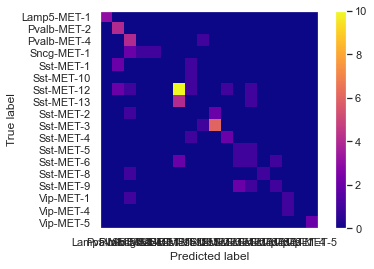

Average accuracy: 0.5991248097412482
Average MRR: 0.7554567514128017


In [73]:
RFC(filtered_features_df, "MET type")

In [103]:
filtered_features_df.to_csv("gouwens-data/filtered_met_types.csv")

## RFC on cells with significant t-types from filtered cells (352 cells)

In [21]:
t_type_labels = pd.read_csv("combined-data/combined_metadata_filtered.csv", index_col=0)
t_type_labels = t_type_labels[t_type_labels["dataset"] == "gouwens"]
t_type_labels = t_type_labels.rename(columns={"cell_id": "Specimen ID"})
t_type_labels = t_type_labels.drop(columns=['dataset'])
t_type_labels["Specimen ID"] = pd.to_numeric(t_type_labels["Specimen ID"])
t_type_labels

,Specimen ID,t-type
0,601790961,Sst Tac2
1,601803754,Sst Calb2
2,601808698,Sst Hpse
3,601810307,Sst Calb2
4,601811091,Sst Esm1
...,...,...
413,741796557,Sst Myh8
414,741940660,Sst Mme
415,741788179,Sst Tac1
416,742009621,Sst Mme


In [22]:
features_df = pd.read_csv("extracted_features.csv")
features_df

,Specimen ID,T type,MET type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
0,714755043,Sncg Vip Nptx2,Sncg-MET-1,0.076087,0.021594,0.828949,14.596909,0.460521,0.258804,-704.739932,...,0.025154,0.839016,0.275014,0.419788,0.000000,0.000000,0.333333,0.666667,2.522126,0.723234
1,658012080,Sst Crhr2 Efemp1,Sst-MET-12,0.135356,0.111187,0.855302,10.753656,0.690728,0.454090,-1254.649974,...,0.036473,0.963527,0.373547,0.580762,0.400000,0.000000,0.400000,0.200000,3.656877,0.825192
2,663193112,Pvalb Gpr149 Islr,Pvalb-MET-3,0.141751,0.291822,0.881167,14.244784,0.656641,0.390143,-345.340358,...,0.000603,0.999397,0.243211,0.180447,0.166667,0.333333,0.333333,0.166667,2.454357,0.644408
3,827447865,Lamp5 Plch2 Dock5,Lamp5-MET-1,0.066712,0.106764,0.798974,11.195610,0.424800,0.586675,786.188159,...,0.000000,1.000000,0.364856,0.507987,0.200000,0.000000,0.200000,0.600000,2.522022,0.321378
4,808875776,Sst Hpse Sema3c,Sst-MET-7,0.106151,0.200166,0.841442,13.436469,0.340889,0.593804,-305.607538,...,0.034576,0.965424,0.283630,0.588331,0.400000,0.000000,0.000000,0.600000,2.391990,0.553258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,601811091,Sst Esm1,Sst-MET-13,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
484,913928092,Sncg Gpr50,Sncg-MET-1,0.072372,0.115160,0.835046,11.887683,0.737567,0.644806,-779.943733,...,0.000000,1.000000,0.433884,0.376033,0.250000,0.250000,0.250000,0.250000,3.393031,0.665245
485,871782504,Pvalb Reln Tac1,Pvalb-MET-3,0.042901,0.134388,0.866301,11.642856,0.308193,0.378408,-393.698171,...,0.000000,1.000000,0.437388,0.345117,0.400000,0.000000,0.200000,0.400000,2.237695,0.617466
486,661492805,Sst Calb2 Pdlim5,Sst-MET-4,0.131591,0.111315,0.855282,42.779886,0.395676,0.609369,396.106162,...,0.000000,1.000000,0.412364,0.629755,0.400000,0.200000,0.400000,0.000000,2.413561,0.496712


In [23]:
filtered_features_df = t_type_labels.merge(features_df, on="Specimen ID", how="left").dropna()
filtered_features_df = filtered_features_df.drop(columns=['T type', 'MET type'])
filtered_features_df

,Specimen ID,t-type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
1,601803754,Sst Calb2,0.042651,0.101365,0.750487,16.787736,0.569871,0.224995,1124.662599,3502.386535,...,0.037280,0.962720,0.460057,0.345760,0.375000,0.125000,0.125000,0.375000,4.108235,0.188472
2,601808698,Sst Hpse,0.042200,0.341426,0.844058,10.022848,0.423536,0.588584,333.702937,-568.253216,...,0.000000,1.000000,0.316378,0.046954,0.250000,0.250000,0.500000,0.000000,2.309168,0.500847
3,601810307,Sst Calb2,0.089760,0.234827,0.842963,12.242106,0.375707,0.346145,1355.104251,-120.610646,...,0.019544,0.980456,0.454165,0.201024,0.333333,0.000000,0.166667,0.500000,3.226121,0.297408
4,601811091,Sst Esm1,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
5,602231708,Sst Calb2,0.052813,0.349817,0.809972,24.640114,0.273554,0.558686,-314.130881,-76.505127,...,0.159046,0.840954,0.279324,0.985089,0.500000,0.250000,0.250000,0.000000,1.413938,0.612720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,741796557,Sst Myh8,0.005424,0.466696,0.856802,32.757400,0.254609,0.579450,-312.619344,-38.461155,...,0.033803,0.966197,0.426479,0.636056,0.000000,0.400000,0.400000,0.200000,2.589227,0.695559
414,741940660,Sst Mme,0.027292,0.395459,0.898912,36.184461,0.499164,0.614126,-224.775163,-439.415017,...,0.096987,0.903013,0.205273,0.497175,0.400000,0.000000,0.200000,0.400000,1.612431,0.705150
415,741788179,Sst Tac1,0.049701,0.085008,0.803112,14.527444,0.488806,0.652476,2290.156362,-635.438035,...,0.000000,1.000000,0.495528,0.195886,0.166667,0.166667,0.333333,0.333333,3.170365,0.344404
416,742009621,Sst Mme,0.118652,0.465963,0.848846,45.574103,0.668808,0.795434,-302.287551,-149.382972,...,0.000000,1.000000,0.422131,0.601548,0.500000,0.000000,0.250000,0.250000,3.089986,0.803078


In [24]:
t_type_counts = filtered_features_df['t-type'].value_counts()
sig_t_types = t_type_counts[t_type_counts >= 10].to_dict()
print(len(sig_t_types))
sig_t_types

20


{'Sst Calb2': 35,
 'Sst Hpse': 34,
 'Pvalb Reln': 27,
 'Sst Tac1': 19,
 'Sst Crhr2': 19,
 'Lamp5 Plch2': 18,
 'Sst Rxfp1': 18,
 'Sst Esm1': 17,
 'Vip Crispld2': 17,
 'Sst Chodl': 16,
 'Sncg Vip': 15,
 'Vip Lmo1': 15,
 'Pvalb Tpbg': 15,
 'Lamp5 Lsp1': 15,
 'Sst Tac2': 14,
 'Pvalb Sema3e': 13,
 'Sst Myh8': 13,
 'Sst Mme': 11,
 'Vip Pygm': 11,
 'Sst Nts': 10}

In [25]:
filtered_features_df = filtered_features_df[filtered_features_df['t-type'].isin(sig_t_types)]
filtered_features_df = filtered_features_df.set_index('Specimen ID')
filtered_features_df

,t-type,Axon Bias X (millimeters),Axon Bias Y (millimeters),Axon Contraction,Axon Emd With Basal Dendrite,Axon Extent X (millimeters),Axon Extent Y (millimeters),Axon Hist Pc 0,Axon Hist Pc 1,Axon Hist Pc 2,...,Basal Dendrite Pct Below Axon,Basal Dendrite Pct Intersect Axon,Basal Dendrite Soma Percentile X,Basal Dendrite Soma Percentile Y,Basal Dendrite Stem Exit Down,Basal Dendrite Stem Exit Side Less,Basal Dendrite Stem Exit Side More,Basal Dendrite Stem Exit Up,Basal Dendrite Total Length (millimeters),Normalized Soma Depth
Specimen ID,,,,,,,,,,,,,,,,,,,,,
601803754,Sst Calb2,0.042651,0.101365,0.750487,16.787736,0.569871,0.224995,1124.662599,3502.386535,140.955477,...,0.037280,0.962720,0.460057,0.345760,0.375000,0.125000,0.125000,0.375000,4.108235,0.188472
601808698,Sst Hpse,0.042200,0.341426,0.844058,10.022848,0.423536,0.588584,333.702937,-568.253216,-1113.452584,...,0.000000,1.000000,0.316378,0.046954,0.250000,0.250000,0.500000,0.000000,2.309168,0.500847
601810307,Sst Calb2,0.089760,0.234827,0.842963,12.242106,0.375707,0.346145,1355.104251,-120.610646,1018.256777,...,0.019544,0.980456,0.454165,0.201024,0.333333,0.000000,0.166667,0.500000,3.226121,0.297408
601811091,Sst Esm1,0.005654,0.459159,0.850263,41.430893,0.686437,1.020017,-485.913541,-135.069901,45.262030,...,0.000000,1.000000,0.244280,0.431365,0.250000,0.000000,0.250000,0.500000,3.468154,0.824576
602231708,Sst Calb2,0.052813,0.349817,0.809972,24.640114,0.273554,0.558686,-314.130881,-76.505127,-416.672838,...,0.159046,0.840954,0.279324,0.985089,0.500000,0.250000,0.250000,0.000000,1.413938,0.612720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741796557,Sst Myh8,0.005424,0.466696,0.856802,32.757400,0.254609,0.579450,-312.619344,-38.461155,-327.014405,...,0.033803,0.966197,0.426479,0.636056,0.000000,0.400000,0.400000,0.200000,2.589227,0.695559
741940660,Sst Mme,0.027292,0.395459,0.898912,36.184461,0.499164,0.614126,-224.775163,-439.415017,-188.968283,...,0.096987,0.903013,0.205273,0.497175,0.400000,0.000000,0.200000,0.400000,1.612431,0.705150
741788179,Sst Tac1,0.049701,0.085008,0.803112,14.527444,0.488806,0.652476,2290.156362,-635.438035,1336.198619,...,0.000000,1.000000,0.495528,0.195886,0.166667,0.166667,0.333333,0.333333,3.170365,0.344404


Accuracy for fold 1: 0.5633802816901409
Normalized Soma Depth                             0.055020
Axon Hist Pc 2                                    0.049011
Axon Hist Pc 0                                    0.044164
Axon Soma Percentile Y                            0.043576
Axon Hist Pc 3                                    0.036105
Axon Pct Above Basal Dendrite                     0.034947
Axon Hist Pc 1                                    0.031172
Basal Dendrite Soma Percentile Y                  0.030279
Basal Dendrite Max Path Distance (millimeters)    0.029455
Basal Dendrite Extent X (millimeters)             0.028672
dtype: float64
Accuracy for fold 2: 0.4788732394366197
Normalized Soma Depth                                  0.055674
Axon Hist Pc 2                                         0.043800
Axon Hist Pc 0                                         0.043092
Basal Dendrite Extent X (millimeters)                  0.040924
Axon Pct Above Basal Dendrite                          0.03

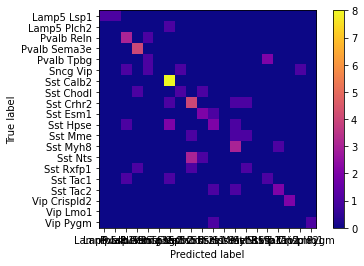

Average accuracy: 0.5084507042253521


In [26]:
RFC(filtered_features_df, "t-type")

In [113]:
filtered_features_df.to_csv("gouwens-data/filtered_t_types.csv")

Accuracy for fold 1: 0.5352112676056338
Accuracy for fold 2: 0.43661971830985913
Accuracy for fold 3: 0.4714285714285714
Accuracy for fold 4: 0.5285714285714286
Accuracy for fold 5: 0.5714285714285714


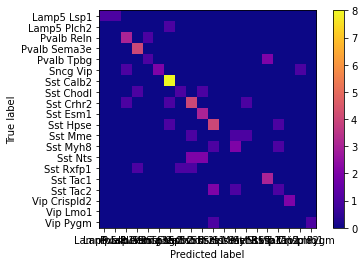

Average accuracy: 0.5086519114688128


In [22]:
# without soma depth
new_df = filtered_features_df.drop("Normalized Soma Depth", axis=1)
RFC(new_df, "t-type")

## Plot Accuracy and MRR across methods

### T-type

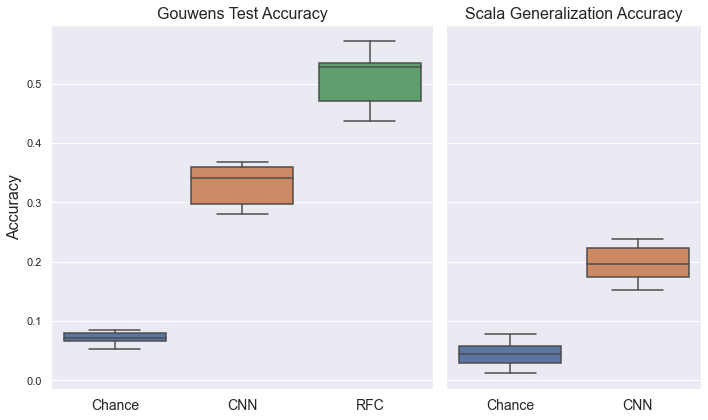

In [127]:
# Accuracy
gouwens_accuracy = {}
gouwens_accuracy["Chance"] = [0.0712, 0.0532, 0.0788, 0.0842, 0.0663]
gouwens_accuracy["CNN"] = [0.3402, 0.2978, 0.3678, 0.3591, 0.2809]
gouwens_accuracy["RFC"] = [0.5352, 0.4366, 0.4714, 0.5286, 0.5714]

scala_accuracy = {}
scala_accuracy["Chance"] = [0.0445, 0.0126, 0.0287, 0.0569, 0.0773]
scala_accuracy["CNN"] = [0.1968, 0.1734, 0.1525, 0.2236, 0.2380]

boxplot_data_gouwens = pd.DataFrame.from_dict(gouwens_accuracy)
boxplot_data_scala = pd.DataFrame.from_dict(scala_accuracy)

f, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw=dict(width_ratios=[3, 2]))

sns.boxplot(data=boxplot_data_gouwens, ax=axs[0])
axs[0].set_ylabel("Accuracy", fontsize=16)
axs[0].set_xticklabels(gouwens_accuracy.keys(), fontsize=14)
axs[0].set_title("Gouwens Test Accuracy", fontsize=16)
                      
sns.boxplot(data=boxplot_data_scala, ax=axs[1])
axs[1].set_xticklabels(scala_accuracy.keys(), fontsize=14)
axs[1].set_title("Scala Generalization Accuracy", fontsize=16)
f.tight_layout()
plt.savefig("acc.png")

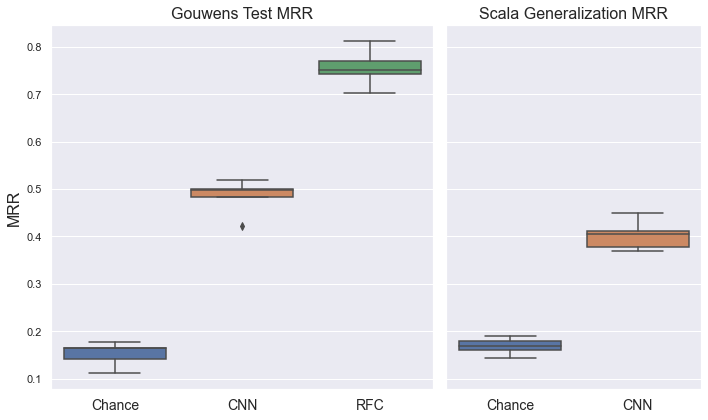

In [124]:
# MRR
gouwens_mrr = {}
gouwens_mrr["Chance"] = [0.1776, 0.1123, 0.1420, 0.1649, 0.1635]
gouwens_mrr["CNN"] = [0.4823, 0.4212, 0.5007, 0.4968, 0.5185]
gouwens_mrr["RFC"] = [0.7702, 0.8114, 0.7514, 0.7422, 0.7019]

scala_mrr = {}
scala_mrr["Chance"] = [0.1427, 0.1783, 0.1903, 0.1684, 0.1599]
scala_mrr["CNN"] = [0.4043, 0.4110, 0.3692, 0.4486, 0.3775]

boxplot_data_gouwens = pd.DataFrame.from_dict(gouwens_mrr)
boxplot_data_scala = pd.DataFrame.from_dict(scala_mrr)

f, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw=dict(width_ratios=[3,2]))

sns.boxplot(data=boxplot_data_gouwens, ax=axs[0])
axs[0].set_ylabel("MRR", fontsize=16)
axs[0].set_xticklabels(gouwens_mrr.keys(), fontsize=14)
axs[0].set_title("Gouwens Test MRR", fontsize=16)

sns.boxplot(data=boxplot_data_scala, ax=axs[1])
axs[1].set_xticklabels(scala_mrr.keys(), fontsize=14)
axs[1].set_title("Scala Generalization MRR", fontsize=16)
f.tight_layout()

### Subclass

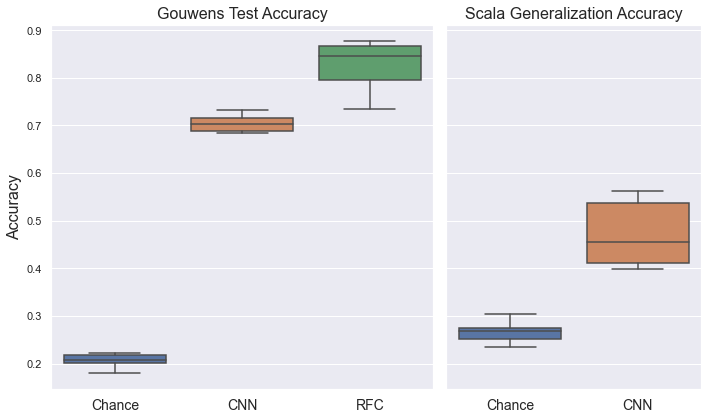

In [128]:
# Accuracy
gouwens_accuracy = {}
gouwens_accuracy["Chance"] = [0.2213, 0.1809, 0.2184, 0.2073, 0.2018]
gouwens_accuracy["CNN"] = [0.6841, 0.7033, 0.6885, 0.7312, 0.7160]
gouwens_accuracy["RFC"] = [0.7959, 0.7347, 0.8659, 0.8762, 0.8453]

scala_accuracy = {}
scala_accuracy["Chance"] = [0.3045, 0.2341, 0.2688, 0.2740, 0.2516]
scala_accuracy["CNN"] = [0.3989, 0.4102, 0.5631, 0.5367, 0.4557]

boxplot_data_gouwens = pd.DataFrame.from_dict(gouwens_accuracy)
boxplot_data_scala = pd.DataFrame.from_dict(scala_accuracy)

f, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw=dict(width_ratios=[3, 2]))

sns.boxplot(data=boxplot_data_gouwens, ax=axs[0])
axs[0].set_ylabel("Accuracy", fontsize=16)
axs[0].set_xticklabels(gouwens_accuracy.keys(), fontsize=14)
axs[0].set_title("Gouwens Test Accuracy", fontsize=16)
                      
sns.boxplot(data=boxplot_data_scala, ax=axs[1])
axs[1].set_xticklabels(scala_accuracy.keys(), fontsize=14)
axs[1].set_title("Scala Generalization Accuracy", fontsize=16)
f.tight_layout()
plt.savefig("acc.png")

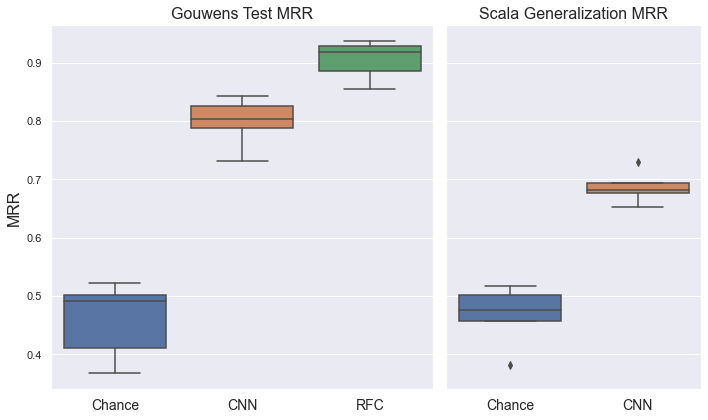

In [140]:
# MRR
gouwens_mrr = {}
gouwens_mrr["Chance"] = [0.4103, 0.3684, 0.4905, 0.5012, 0.5216]
gouwens_mrr["CNN"] = [0.8257, 0.8431, 0.8039, 0.7872, 0.7315]
gouwens_mrr["RFC"] = [0.8855, 0.8541, 0.9278, 0.9364, 0.9175]

scala_mrr = {}
scala_mrr["Chance"] = [0.4572, 0.3821, 0.5008, 0.5171, 0.4766]
scala_mrr["CNN"] = [0.6934, 0.6757, 0.6810, 0.7298, 0.6523]

boxplot_data_gouwens = pd.DataFrame.from_dict(gouwens_mrr)
boxplot_data_scala = pd.DataFrame.from_dict(scala_mrr)

f, axs = plt.subplots(1, 2, figsize=(10, 6), sharey=True, gridspec_kw=dict(width_ratios=[3,2]))

sns.boxplot(data=boxplot_data_gouwens, ax=axs[0])
axs[0].set_ylabel("MRR", fontsize=16)
axs[0].set_xticklabels(gouwens_mrr.keys(), fontsize=14)
axs[0].set_title("Gouwens Test MRR", fontsize=16)

sns.boxplot(data=boxplot_data_scala, ax=axs[1])
axs[1].set_xticklabels(scala_mrr.keys(), fontsize=14)
axs[1].set_title("Scala Generalization MRR", fontsize=16)
f.tight_layout()

### MET-type

Text(0.5, 1.0, 'Gouwens Test Accuracy')

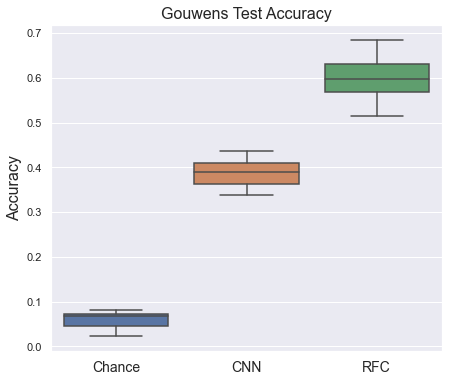

In [137]:
# Accuracy
gouwens_accuracy = {}
gouwens_accuracy["Chance"] = [0.0224, 0.0715, 0.0826, 0.0450, 0.0679]
gouwens_accuracy["CNN"] = [0.3901, 0.3386, 0.4100, 0.3624, 0.4365]
gouwens_accuracy["RFC"] = [0.6301, 0.6849, 0.5972, 0.5694, 0.5139]

boxplot_data_gouwens = pd.DataFrame.from_dict(gouwens_accuracy)

f, axs = plt.subplots(1, 1, figsize=(7, 6))

b = sns.boxplot(data=boxplot_data_gouwens, ax=axs)
b.set_ylabel("Accuracy", fontsize=16)
b.set_xticklabels(gouwens_accuracy.keys(), fontsize=14)
b.set_title("Gouwens Test Accuracy", fontsize=16)

Text(0.5, 1.0, 'Gouwens Test MRR')

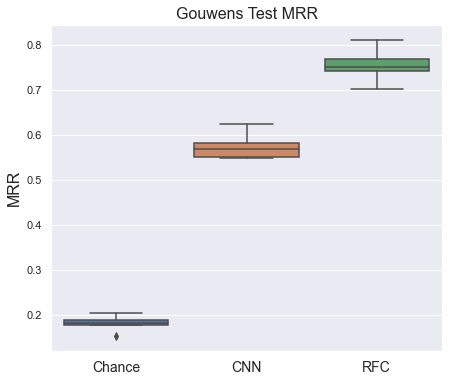

In [138]:
# MRR
gouwens_mrr = {}
gouwens_mrr["Chance"] = [0.1836, 0.1772, 0.1890, 0.1526, 0.2045]
gouwens_mrr["CNN"] = [0.5822, 0.5691, 0.6237, 0.5483, 0.5517]
gouwens_mrr["RFC"] = [0.7702, 0.8114, 0.7514, 0.7422, 0.7019]

boxplot_data_gouwens = pd.DataFrame.from_dict(gouwens_mrr)

f, axs = plt.subplots(1, 1, figsize=(7, 6))

b = sns.boxplot(data=boxplot_data_gouwens, ax=axs)
b.set_ylabel("MRR", fontsize=16)
b.set_xticklabels(gouwens_accuracy.keys(), fontsize=14)
b.set_title("Gouwens Test MRR", fontsize=16)